In [1]:
%cd /media/nicola/Data/Workspace/OSCAR/Oscar
%pwd

/media/nicola/Data/Workspace/OSCAR/Oscar


'/media/nicola/Data/Workspace/OSCAR/Oscar'

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import json

In [4]:
def prepare_inputs(experiments_file):
    with open(experiments_file, 'rb') as f:
        experiments = pickle.load(f)

    data = pd.DataFrame(experiments)

    # filter out high thresholds
    data = data[data['thresh'] <= 100]

    # compute mean per query
    data = data.groupby(['thresh'], as_index=False).mean()
    data
    data_npy = data.to_numpy()

    thresh, nz_elems, recall = data_npy[:, 0], data_npy[:, 2], data_npy[:, 3]
    return thresh, nz_elems, recall

In [5]:
# values is a dict of [series_name: (thresh, nz_elems, recall)]

def plot(values, figsize=(10,5), legend_loc='lower right', xlabel='SQ threshold', show_annotations=[True, False]): # values is a dict: key: "name", value: list of tuples
    plt.figure(figsize=figsize)
    marker = ['#133248', '#7a972c', '#800000', '#f09d06']
    for i, (name, p) in enumerate(values.items()):
        # plt.ylim(50, 85)
        plt.xticks(p[0])
        plt.xscale('log')
        plt.xlabel(xlabel)
        plt.ylabel("Recall@500")
        plt.plot(p[0], p[2], 's-', color=marker[i], markersize=5, label=name)
        if show_annotations[i]:
            for x, y, nz_elem in zip(p[0], p[2], p[1]):
                plt.annotate(str(int(nz_elem)), (x, y), xytext=(-25, 10),  # 3 points vertical offset
                        textcoords="offset points",bbox=dict(boxstyle="square,pad=0.2", fc="cyan", ec="b", lw=1))
    plt.grid(which="both")
    plt.legend(loc=legend_loc, prop={'size': 9})
    # plt.legend()

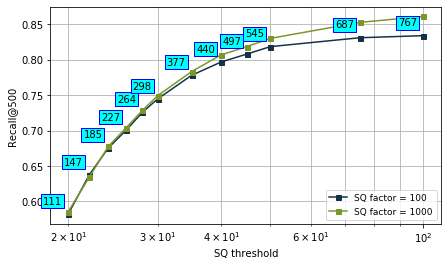

In [28]:
experiments_file_f100 = os.path.join('vbs', 'experiments', 'experiments_factor100.pkl')
data_f100 = prepare_inputs(experiments_file_f100)
experiments_file_f1000 = os.path.join('vbs', 'experiments', 'experiments_factor1000.pkl')
data_f1000 = prepare_inputs(experiments_file_f1000)

data = {'SQ factor = 100': data_f100, 'SQ factor = 1000': data_f1000}
plot(data, figsize=(7,4))
plt.savefig('vbs/VBS_recall_vs_threshold.pdf')

21
          1-sentence query  2-sentences query  3-sentences query
$\gamma$                                                        
18                 583.375            675.250           2167.000
22                 465.125            951.750           2386.250
26                 322.250            340.000           1363.750
30                 162.500            322.500           1047.125
40                  81.125            209.000            795.250
50                  97.125            255.375            662.750
None               137.750            288.125            868.500


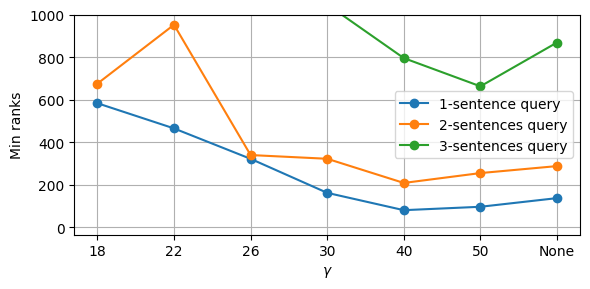

In [10]:
# VBS 2019 GT EVALUATION
gt_evaluation = 'alad/extraction/v3c_gt_evaluation/gt_evaluation_results.json'
with open(gt_evaluation, 'r') as f:
    gt_experiments = json.load(f)
print(len(gt_experiments))
df = pd.DataFrame(gt_experiments)
df['ranks_std'] = df['ranks'].map(lambda rank: np.std(np.asarray(rank)))
df['ranks'] = df['ranks'].map(lambda rank: sum(rank) / len(rank))
df = df.pivot(index="sq_thr", columns="mode", values="ranks")
df.columns = ['1-sentence query', '2-sentences query', '3-sentences query']
df.index.names = ['$\gamma$']
print(df)
df.plot(grid=True, style="o-", figsize=(6,3))
plt.ylabel('Min ranks')
plt.ylim(top=1000)
plt.tight_layout()
plt.savefig('alad/extraction/v3c_gt_evaluation/plots/VBS_min_ranks.pdf')

                   mode sq_thr  query_0  query_1  query_2  query_3  query_4  \
0  2-queries-merged-min     18      341      407        2     3446        9   
1  2-queries-merged-min     22      164      179        2     6494        2   
2  2-queries-merged-min     26       56      267        2     1687        6   
3  2-queries-merged-min     30       62      301        2     1215        5   
4  2-queries-merged-min     40       50      185        3     1007        6   
5  2-queries-merged-min     50       31      127        3     1369        4   
6  2-queries-merged-min   None       33       32        1     1598        5   

   query_5  query_6  query_7  
0      234       68      895  
1       14       51      708  
2       20       30      652  
3       39       50      906  
4       29       48      344  
5       12       42      455  
6       38      291      307  


<AxesSubplot:xlabel='sq_thr'>

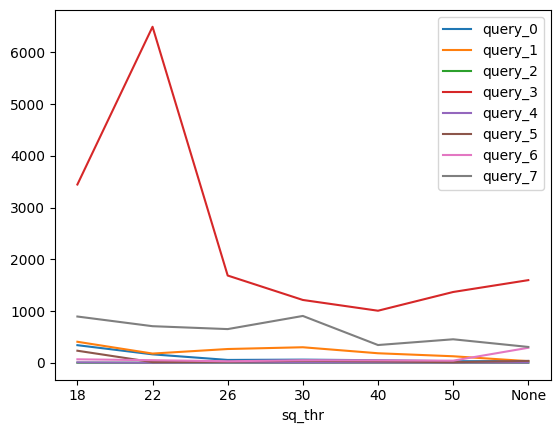

In [8]:
df = pd.DataFrame(gt_experiments)
for i in range(8):
    df['query_'+str(i)] = df['ranks'].map(lambda rank: rank[i])
del df['ranks']
df = df.loc[df['mode'] == '2-queries-merged-min']
df = pd.concat([df[df['sq_thr'] != 'None'], df[df['sq_thr'] == 'None']], ignore_index=True)
print(df)
df.plot(x="sq_thr")

             ranks                                          
mode   1-query-min 2-queries-merged-min 3-queries-merged-min
sq_thr                                                      
20         505.625              364.000              739.250
26         314.625              198.500              708.875
40         466.750              309.000              772.750
None       699.250              337.625             1151.000


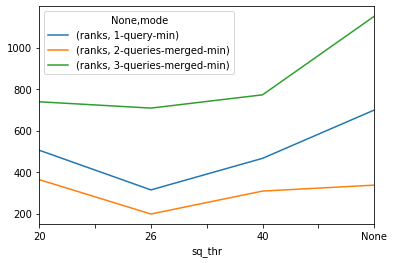

                   mode sq_thr  query_0  query_1  query_2  query_3  query_4  \
0  2-queries-merged-min     18      341      407        2     3446        9   
1  2-queries-merged-min     22      164      179        2     6494        2   
2  2-queries-merged-min     26       56      267        2     1687        6   
3  2-queries-merged-min     30       62      301        2     1215        5   
4  2-queries-merged-min     40       50      185        3     1007        6   
5  2-queries-merged-min     50       31      127        3     1369        4   
6  2-queries-merged-min   None       33       32        1     1598        5   

   query_5  query_6  query_7  
0      234       68      895  
1       14       51      708  
2       20       30      652  
3       39       50      906  
4       29       48      344  
5       12       42      455  
6       38      291      307  


<AxesSubplot:xlabel='sq_thr'>

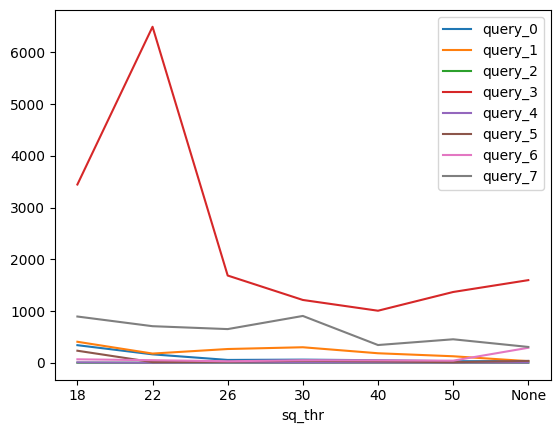

In [9]:
df = pd.DataFrame(gt_experiments)
for i in range(8):
    df['query_'+str(i)] = df['ranks'].map(lambda rank: rank[i])
del df['ranks']
df = df.loc[df['mode'] == '2-queries-merged-min']
df = pd.concat([df[df['sq_thr'] != 'None'], df[df['sq_thr'] == 'None']], ignore_index=True)
print(df)
df.plot(x="sq_thr")